## Reading NumPy Arrays

NumPy provides various ways of reading arrays from files, whether they are written as ASCII text ("plain text") or in a specialized binary format.  Related functions provide the ability to write arrays out to files.  We'll examine a few of those functions here. (For a NumPy array refresher, consult the <a href= "https://ecornell.s3.amazonaws.com/content/CAC/CAC105/cac105_numpy-array-tip-sheet.pdf">NumPy Array Tip Sheet</a>.)

First, let's look in our current working directory to see what data files we might have to work with.  Jupyter notebooks provide a capability for executing commands in the shell, or command line, external to the notebook, by beginning a command with the "!" character (exclamation point, or "bang").  The Linux command "ls" lists the contents in the current directory.  We can execute this command from within the notebook by entering and evaluating the expression ```!ls```.  (You could also list the contents of the directory with the ```%ls``` magic function, but since we'll be issuing a few additional commands below that don't have magic function equivalents, we might as well use the "!" notation for all of them.)

### Step 1.

Execute the expression in the code cell below and evaluate the results. You will see the name of a data file (with .txt suffix).

In [1]:
!ls

data.txt      jn.py	__pycache__	 readNumpy.png
gradebook.db  logo.npy	ReadNumPy.ipynb


Notice that there is a data file named ```data.txt```.  Using the ```head``` command in Linux, we can print out the first 10 lines of the file to see what it consists of.

### Step 2.

Enter and execute ```!head data.txt``` in the code cell below.

In [2]:
!head data.txt

52 119
53 119
54 119
55 119
56 119
57 119
58 119
59 119
60 119
61 119


It looks like the file contains a pair of integers on each row, which is something that we could read into a NumPy array.  Before doing so, we might want to figure out how many lines are in the file (since if it is a ridiculously large number, we might want to think twice about reading it all in).  The ```wc -l``` command in Linux ("wc -l" is short for "word count -lines", i.e., it returns the number of lines in a file).

### Step 3.

Enter and execute ```!wc -l data.txt``` in the code cell below, to see how many lines it has.

In [3]:
!wc -l data.txt

3569 data.txt


The file is not too big, so let's go ahead and read it in.

First, you'll need to ```import numpy as np``` in order to access that module.  Then you will want to use the ```np.loadtxt``` function in order to read in the data that is stored in the plain text file ```data.txt```.

```np.loadtxt``` requires at least one argument, which is the name of the file that you want to read in.  The filename is passed as a Python string, for example, <code>"data.txt"</code>.

### Step 4.

Enter and evaluate an expression to read in the contents of the data file and assign it to the variable ```data```.

In [4]:
import numpy as np
data = np.loadtxt("data.txt")

### Step 5.

Let's examine some basic attributes of the data array.  In the code cell below, print both the ```shape``` and the ```dtype``` attributes of the array ```data```.

In [5]:
print(data.shape)
print(data.dtype)

(3569, 2)
float64


By default, the ```dtype``` of arrays read in via ```np.loadtxt``` is ```float64``` (floating point numbers).  When we peeked at the data file above using the ```head``` command, it looked like the data might contain all integer (int) values.  We can refine our call to ```np.loadtxt``` to tell it to read in the data as ```dtype=int``` instead, by supplying that as an additional option to the function call.

### Step 6.

In the code cell below, enter and evaluate a revised version of your call to ```np.loadtxt```, supplying an additional option to read in the data as integers, and assign the result to the variable ```data```.  Verify afterwards that the ```dtype``` of ```data``` is now int64 (64-bit integers, or int).

## Graded Cell

This cell is worth 30% of the grade for this assignment.

In [6]:
data = np.loadtxt("data.txt", dtype=int)
print(data.dtype)

int64


## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [7]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testType

try:
    print(testType(data))    
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


Even though we have read the data in, we don't really know anything about it other than its type and its shape (3569 rows by 2 columns).

### Step 7.

In the code cell below -- recalling that the `axis` parameter can be passed to methods and functions, in order to operate over a specified dimension of an array (for example: `axis=0`, `axis=1` )-- do the following:

* write an expression to compute the minimum value in each column, using the ```min``` method of an array, and assign the result to the variable ```minvals```, which should be an array containing two elements (one for each column)
* write an expression to compute the maximum value in each column, using the ```max``` method of an array, and assign the result to the variable ```maxvals```, which should be an array containing two elements (one for each column)
* print the values of ```minvals``` and ```maxvals``` so you can examine the range of the data

## Graded Cell

This cell is worth 30% of the grade for this assignment.

In [8]:
import numpy as np
minvals = np.min(data, axis=0)
maxvals = np.max(data, axis=0)

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [9]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testMinvals, testMaxvals

try:
    print(testMinvals(minvals))
except Exception as e:
    print("Error!\n" + str(e))

try:
    print(testMaxvals(maxvals))
except Exception as e:
    print("Error!\n" + str(e))


Correct! minvals has the correct value.
Correct! maxvals has the correct value.


Sometimes it is useful to plot some new data you are working with, to get a sense of what it looks like.  Since the array consists of two columns, it might be helpful to plot one column against the other, i.e., treat one column as "x" data and the other as associated "y" data.

### Step 8.

In the code cell below, fill in the missing code (denoted as ```___```) so that you can plot the first column of the array on the x-axis, and the second column of the array on the y-axis.  (Recall that we are plotting columns, which is why we first slice over all rows in the first index with ```:``` ; recall also how we start counting when we are indexing into an array or list.)  The code below also specifies a square figure size, since we know from our examination above about ```minvals``` and ```maxvals``` that the range of the data is the same in each dimension.

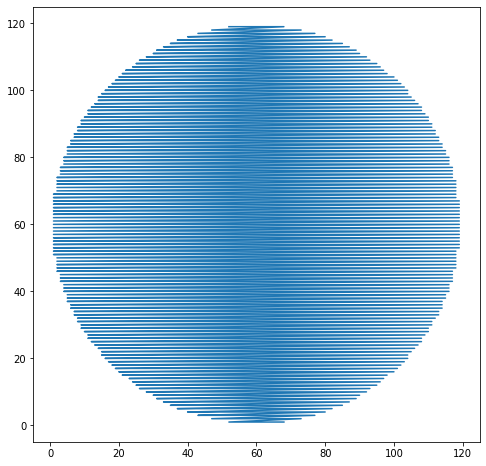

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.plot(data[:,0], data[:,1])


That plot is not particularly informative.  It looks like the data points are criss-crossing back and forth across the plane, making it hard to discern a pattern.  In such a case, a scatter plot is sometimes useful.

### Step 9.

In the code cell below, fill in the missing code to make a scatter plot of the two columns in the data.  (A few extra plotting options have been added to improve the resulting figure.)

## Graded Cell

This cell is worth 40% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment.</i>

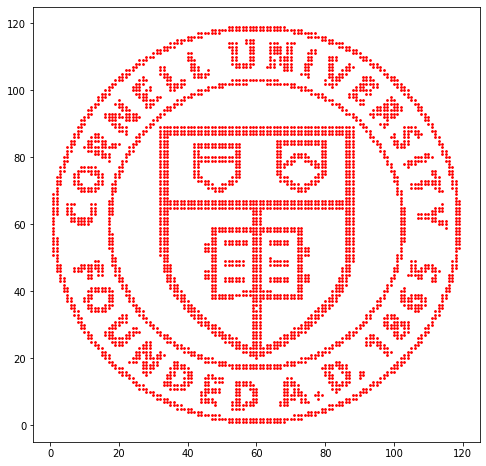

In [11]:
# FILL IN THE MISSING CODE BELOW

plt.figure(figsize=(8,8))
plt.scatter(data[:,0], data[:,1], s=3, c='r')


Aha!  That's what the data represents! (You're plot should reveal the Cornell logo.  If it doesn't go back and fix your plotting commands above until it does.)


For what it's worth, the file ```data.txt``` was generated by processing a low-resolution jpeg image of the Cornell logo.  Images are built up out of raster data, which are essentially one or more two-dimensional arrays describing the intensity of pixels in the image.  Several image processing packages are available to convert images to numpy arrays.

We noted above that we can read and write files either from plain text files or binary files.  What are "binary files"?  

They are files in which data are packed in as a sequence of bytes (1 byte = 8 bits), rather than encoded as text characters.  The data are packed in some specified format, which means that they can hold data, images, computer programs, etc.  But in order to unpack a binary file, you need to know what the format is, i.e., how the data were packed in the first place.

NumPy provides the functions ```loadtxt``` and ```savetxt``` for loading (reading) and saving (writing) arrays encoded in plain text files.  Similarly, it provides the functions ```load``` and ```save``` for reading and writing arrays in a specific binary format, the so-called NumPy ```.npy``` format.  The advantage of saving files to binary format is that the data are stored to full precision, along with information about their dtype, and binary files can be smaller than a text file encoding the same data.  The disadvantage of using binary files is that they are less portable to other programming environments; while NumPy knows how to load a .npy file that has been saved, that might not be the case for other libraries or languages.

### Step 10.

In the code cell below, use ```np.save``` to save the ```data``` array to a new file named ```logo.npy```.
Consult the <a href='https://numpy.org/doc/stable/reference/generated/numpy.save.html'>online documentation</a> for more information on how to use `np.save`.

In [12]:
np.save('logo.npy',data)

Just because the new file ```logo.npy``` is in binary format doesn't mean we can't look at it, although the results of such a process are not especially meaningful.

### Step 11.

Use the ```head``` command used in Step 2 to look at the first few lines of ```logo.npy```.  You should notice that there is some legible metadata encoded with text characters at the top of the file, describing, for example, the shape of the array and its dtype ('<i8' is equivalent to 'int64').  All of the illegible stuff that follows is due to the fact that the binary data describing the array values are being interpreted as text and/or control characters rather than the 64-bit integers (int64) that they actually are. 

In [13]:
data = np.load('logo.npy')
!head logo.npy

�NUMPY v {'descr': '<i8', 'fortran_order': False, 'shape': (3569, 2), }                                                       
       _              _              _              _              _              _       "       _       #       _       $       _       T       _       U       _       _       _       `       _       a       _       b       _       d       _       e       _       f       _       k       _       l       _              ^              ^              ^              ^              ^       !       ^       "       ^       #       ^       U       ^       V       ^       ^       ^       _       ^       `       ^       a       ^       b       ^       c       ^       d       ^       e       ^       f       ^       k       ^       l       ^              ]              ]              ]              ]              ]              ]              ]              ]              ]              ]              ]               ]       !       ]       V       ]

If you're interested, you could read the data in the logo file back in with a call to ```np.load('logo.npy')```.  Since the binary file stores information about the dtype of the data in the array, you don't need to pass in a dtype option to ```np.load``` in the manner that we did with ```np.loadtxt```.

Even though the visual representation of the logo.npy file is mostly gibberish, the size of the file is perfectly predictable.  Let's revisit our original ```!ls``` command, along with an additional option to get more information about the file.

Evaluate the code cell below.

In [14]:
!ls -l

total 476
-rw-r--r-- 1 codio codio  21989 May 21 22:29 data.txt
-rw-r--r-- 1 codio codio  36864 Mar 15  2019 gradebook.db
-rw-r--r-- 1 codio codio   1521 Jun  4 20:57 jn.py
-rw-r--r-- 1 codio codio  57232 Oct 20 18:57 logo.npy
drwxr-xr-x 1 codio codio    144 Oct  1 13:19 __pycache__
-rw-r--r-- 1 codio codio 249153 Oct 20 18:55 ReadNumPy.ipynb
-rw-r--r-- 1 codio codio 111420 Jun  3 19:54 readNumpy.png


We can see that the listing for logo.npy indicates its file size is 57232 bytes.  The metadata header at the top of the file (describing the dtype, shape, ordering, etc.) takes up 128 bytes.  That means the binary gibberish that follows takes up 57232-128 = 57104 bytes.  Let's think about the data that we packed into the file.  There are 3569 rows and 2 columns per row, and each element in the array is a 64-bit integer.  Since 8 bits = 1 byte, that means each element of the array requires 8 bytes to specify.  So the total amount of memory required to store the array is:

3569 rows x 2 columns per row x 8 bytes per element, or

3569 * 2 * 8

which equals 57104 (as can be verified by executing the cell below):

In [15]:
3569 * 2 * 8

57104